## A股分析 ##

### 数据收集函数 ###

In [1]:
import tushare as ts
import pandas as pd
import time
import datetime
import os
import shutil
import random

# 定义全局变量
DATA_PATH = r'D:\Code\GitHub\stock\data'

# 基本面数据
BASIC = r'basic.csv'
PERFORMANCE = r'performance.csv'
PROFIT = r'profit.csv'
OPERATION = r'operation.csv'
GROWTH = r'growth.csv'
DEBTPAYING = r'debtpaying.csv'
CASHFLOW = r'cashflow.csv'

# 分类数据
AREA = r'area.csv'
CONCEPT = r'concept.csv'
GEM = r'gem.csv'
HS300 = r'hs300.csv'
INDEX = r'index.csv'
INDUSTRY = r'industry.csv'
SME = r'sme.csv'
ST = r'st.csv'
SZ50 = r'sz50.csv'
ZZ500 = r'zz500.csv'

# 时间
YEAR = 2017
QUARTER = 2

# 备份CSV表格
def backup_csv_file(path, csv_file):
    current_time = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
    print('start to backup:', csv_file)
    file = os.path.join(path, csv_file)
    if os.path.exists(file):
        file_bak = file.split('.')[0] + '_' + current_time + '.' + file.split('.')[1]
        file_bak = os.path.join(path, file_bak)
        shutil.copy(file, file_bak)   
        print('csv file backup completed:', file_bak) 
    else:
        print('csv file does not exist!')

# 从股票csv中间获取股票代码
def get_stock_codes(): 
    os.chdir(DATA_PATH)
    df = pd.read_csv(BASIC, encoding='gbk', dtype={'code': object})
    codes = df['code']         
    return codes

# 更新股票基本信息
def update_stock_basic(year=YEAR, quarter=QUARTER):
    os.chdir(DATA_PATH)    
    
    print('stock basic information updating started...')
    # 所有股票基本信息
#     df_basic = ts.get_stock_basics()
#     df_basic.to_csv(BASIC) 
    # 业绩报告
    df_performance = ts.get_report_data(year,quarter)
    df_performance.to_csv(PERFORMANCE)
    # 盈利能力
    df_profit = ts.get_profit_data(year,quarter)
    df_profit.to_csv(PROFIT)
    # 营运能力
    df_operation = ts.get_operation_data(year,quarter)
    df_operation.to_csv(OPERATION)
    # 成长能力
    df_growth = ts.get_growth_data(year,quarter)
    df_growth.to_csv(GROWTH)
    # 偿债能力
    df_debtpagying = ts.get_debtpaying_data(year,quarter)
    df_debtpagying.to_csv(DEBTPAYING)    
    # 现金流量
    df_cashflow = ts.get_cashflow_data(year,quarter)
    df_cashflow.to_csv(CASHFLOW)    
    
    print('stock basic information updating completed...')

# 更新股票分类信息
def update_stock_classification():
    path = os.path.join(DATA_PATH, 'classfication')
    os.chdir(path)
    
    print('stock classfication information updating started...')
    
    # index=False把datetie index转换成列
    # 地域
    area = ts.get_area_classified()
    area.to_csv(AREA, index=False)
    # 概念
    try: 
        concept = ts.get_concept_classified()
        concept.to_csv(CONCEPT, index=False)
    except:
        print('concept data update failed!')
    # 创业板
    gem = ts.get_gem_classified()
    gem.to_csv(GEM, index=False)    
    # 沪深300
    hs300 = ts.get_hs300s()
    hs300.to_csv(HS300, index=False)    
    # 指数
    index = ts.get_index()
    index.to_csv(INDEX, index=False) 
    # 行业
    try: 
        industry = ts.get_industry_classified()
        industry.to_csv(INDUSTRY, index=False)
    except:
        print('industry data update failed!')
    # 中小板
    sme = ts.get_sme_classified()
    sme.to_csv(SME, index=False)    
    # ST
    st = ts.get_st_classified()
    st.to_csv(ST, index=False)    
    # 上证50
    sz50 = ts.get_sz50s()
    sz50.to_csv(SZ50, index=False)
    # 中证500
    zz500 = ts.get_zz500s()
    zz500.to_csv(ZZ500, index=False)   

    print('\nstock classfication information updating completed...')    
    
# 更新个股信息表格
def update_day_data(code):
    print('try to update:', code)
    n = 0
    while (True):
        try:
            k_data = ts.bar(code, ktype='D', adj='qfq', volratio=True)
            # k_data如果存在多行数据，索引名是一个空值而不是datetie，需要重命令索引名
            k_data.index.rename('datetime', inplace=True)
            print('upate %s completed!' %code)
            return k_data
        except:
            if n < 2:
                print('retry to update:', code)
                n = n + 1
                time.sleep(random.randint(0,10))
            else:
                print('update %s failed!' %code)
                return

# 如果Flag=True，则列表中所有股票信息，否则只更新本地不存在股票的信息
def update_csv_day_data(codes, flag=False):
    os.chdir(DATA_PATH)
    os.chdir('code')
        
    for code in codes:
        csv_file = code + '.' + 'csv'
        if (flag==False and os.path.exists(csv_file)):
            continue
        k_data = update_day_data(code)
        if k_data is not None:         
            k_data.to_csv(csv_file)
            
        time.sleep(3)

### 获取数据 ###

In [2]:
print('data collection started at:', datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S') + '\n')
    
# ============搜集数据===============
# 备份股票基本信息
# backup_csv_file(BASIC)
# 更新股票基本信息
# update_stock_basic()
# 更新股票分类信息
# update_stock_classification()

# 更新股票历史信息
# codes = get_stock_codes()
# update_csv_day_data(codes, flag=True)  

print('\ndata collection completed at:', datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

data collection started at: 2017-10-11 20:54:35


data collection completed at: 2017-10-11 20:54:35


### 计算和可视化指标函数 ###

c:\users\anliu\appdata\local\programs\python\python35\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


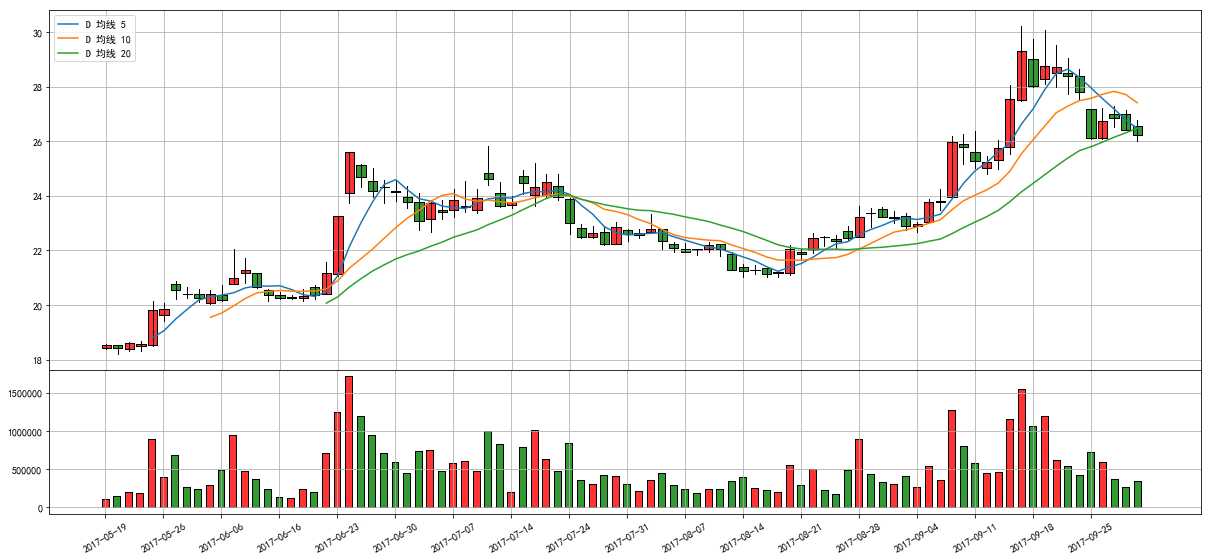

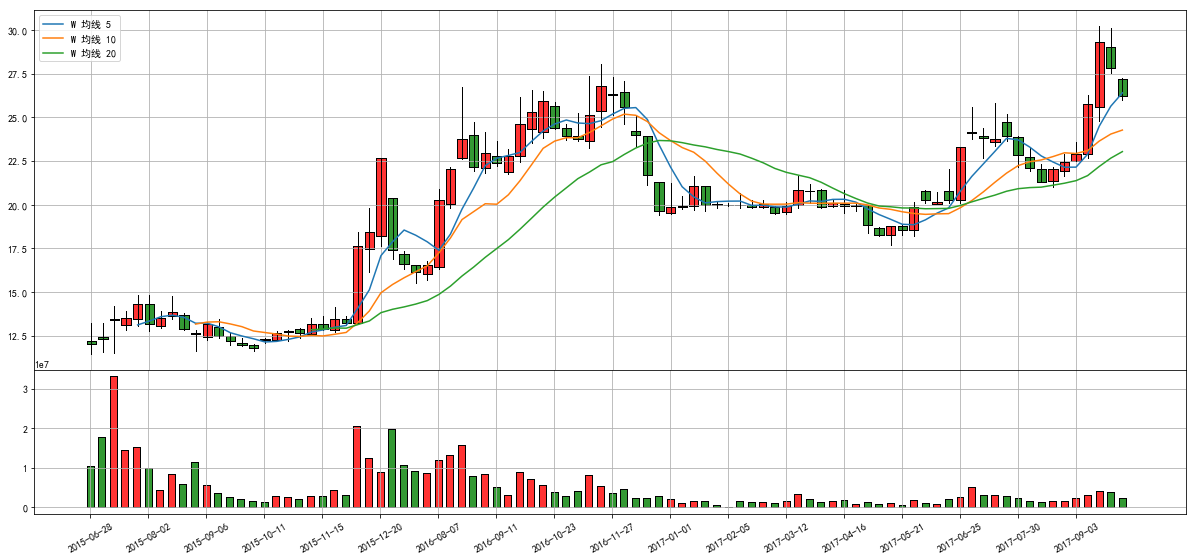

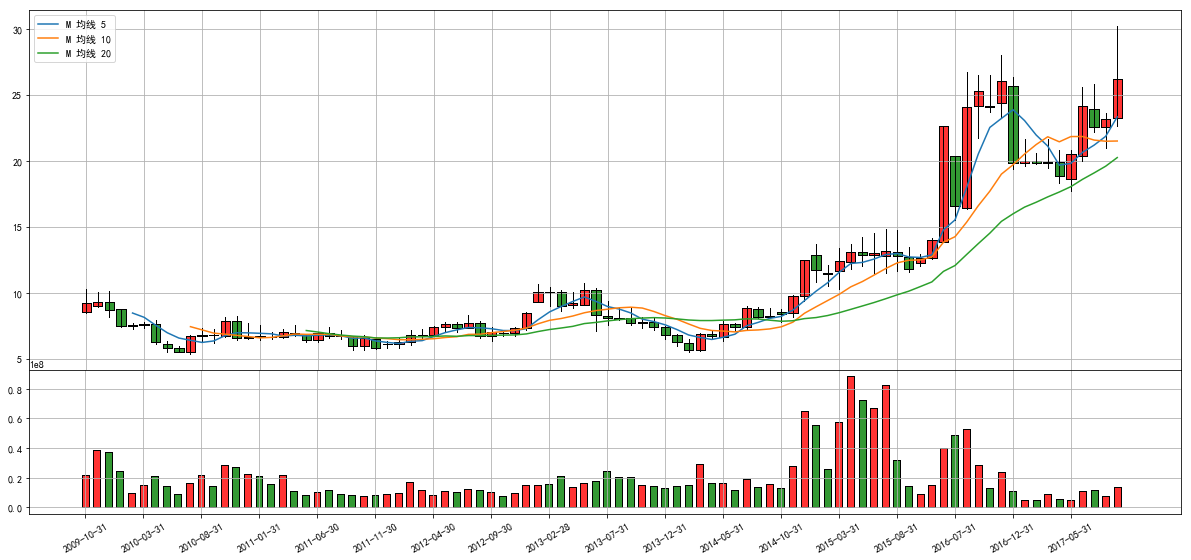

In [3]:
import matplotlib.pyplot as plt
import matplotlib.finance as mpf
import pylab
import matplotlib.dates as md 

# 为pyplot设置中文字体
pylab.mpl.rcParams['font.sans-serif'] = ['SimHei']
pylab.mpl.rcParams['axes.unicode_minus'] = False

# 读取个股信息表格
def read_data_day(code):
    path = os.path.join(DATA_PATH, 'code')
    file = code + '.' + 'csv'
    file = os.path.join(path, file)
    try: 
        stock_data = pd.read_csv(file, encoding='gbk', dtype={'code': object}, parse_dates=[0])
    except:
        print('%s read error!' %file)
        return
    
    return stock_data

# 计算并更新滑动平均值
def ma_calc(ma_list, stock_data):
    if stock_data is None:
        return
    
    stock_data.sort_values('datetime', inplace=True)
    
    # 计算简单算术移动平均线MA
    for ma in ma_list:
        stock_data['MA' + str(ma)] = stock_data['close'].rolling(window=ma).mean()
    # 计算平滑移动平均线EMA
        stock_data['EMA' + str(ma)] = stock_data['close'].ewm(span=ma).mean()
    
#     stock_data.sort_values('datetime', ascending=False, inplace=True)
#     stock_data.to_csv(file, index=False)
    return stock_data

def draw_k_line(code, freq='D', period=90):
    stock_data = read_data_day(code)
    if stock_data is None:
        print('Stock code is error!')
        return
    stock_data.sort_values('datetime', ascending=True, inplace=True)
    stock_data.set_index('datetime', inplace=True)
    
    data_freq = stock_data.resample(freq).last()
    data_freq.dropna(subset=['code'], inplace=True)    
    length = len(data_freq)
    if (length >= period):
        length = period
    data_freq = data_freq[0-length:]      
    data_freq['open'] = stock_data['open'].resample(freq).first()
    data_freq['close'] = stock_data['close'].resample(freq).last()
    data_freq['high'] = stock_data['high'].resample(freq).max()
    data_freq['low'] = stock_data['low'].resample(freq).min()
    data_freq['vol'] = stock_data['vol'].resample(freq).sum()

    data_freq.reset_index(inplace=True)
    
    
    fig = plt.figure(figsize=(16, 10))
    # Add an axes at position rect [left, bottom, width, height] where all quantities are in fractions of figure width and height
    ax1 = fig.add_axes([0,0.2,1,0.5]) 
    ax2 = fig.add_axes([0,0,1,0.2])
    # Represent the open, close as a bar line and high low range as a vertical line.
    mpf.candlestick2_ochl(ax1, data_freq['open'], data_freq['close'], data_freq['high'], data_freq['low'], 
                          width=0.8, colorup='r', colordown='g', alpha=0.8)
    ax1.set_xticks(range(0, length, 5))
    
    ma_list = [5, 10, 20]
    data_ma = ma_calc(ma_list, data_freq)
    for ma in ma_list:
        tmp = 'MA' + str(ma)
        ax1.plot(data_freq[tmp], label=freq+' 均线 '+str(ma))
    
    ax1.legend(loc='upper left')
    ax1.grid(True)

    # Add a volume overlay to the current axes. The opens and closes are used to determine the color of the bar. -1 is missing. If a value is missing on one it must be missing on all
    mpf.volume_overlay(ax2, data_freq['open'], data_freq['close'], data_freq['vol'], 
                       colorup='r', colordown='g', width=0.6, alpha=0.8)
    ax2.set_xticks(range(0, length, 5))
    xticklabels = data_freq['datetime'].dt.strftime('%Y-%m-%d')
    ax2.set_xticklabels(xticklabels[::5], rotation=30)
    ax2.grid(True)    

    plt.show()
    
draw_k_line('000002',  freq='D', period=90)     
draw_k_line('000002',  freq='W', period=90) 
draw_k_line('000002',  freq='M', period=90) 

### 指标计算和可视化 ###

In [4]:
'''
code: 代码
name: 名称
industry: 行业
area: 地域
pe: 市盈率(股价与每股收益的比值)
outstanding: 流通股本(亿)
totals: 总股本(亿)
totalAssets: 总资产(万)
liquidAssets: 流动资产(万)
fixedAssets: 固定资产(万)
reserved: 公积金(万)(留存利润，包括资本公积金和盈余公积金，把这个金额除以公司的总股份数，即得到每股的公积金)
reservedPerShare: 每股公积金(万)
esp: 每股收益(税后利润与股本总数的比值)
bvps: 每股净资产(股东权益与总股数的比值)
pb: 市净率（股价与每股净资产的比值）
timeToMarket: 上市日期
undp: 未分利润
perundp: 每股未分配利润
rev: 收入同比(%)
profit: 利润同比(%)
gpr: 毛利率(%)
npr: 净利润率(%)
holders: 股东人数
'''
# 计算MA
# ma_calc([5,10,20,60], '300170')
# codes = get_stock_codes() 
# for code in codes:
#     ma_calc([5,10,20,60], code)
# 绘制K线图
# draw_k_line('600980', period=90)


'\ncode: 代码\nname: 名称\nindustry: 行业\narea: 地域\npe: 市盈率(股价与每股收益的比值)\noutstanding: 流通股本(亿)\ntotals: 总股本(亿)\ntotalAssets: 总资产(万)\nliquidAssets: 流动资产(万)\nfixedAssets: 固定资产(万)\nreserved: 公积金(万)(留存利润，包括资本公积金和盈余公积金，把这个金额除以公司的总股份数，即得到每股的公积金)\nreservedPerShare: 每股公积金(万)\nesp: 每股收益(税后利润与股本总数的比值)\nbvps: 每股净资产(股东权益与总股数的比值)\npb: 市净率（股价与每股净资产的比值）\ntimeToMarket: 上市日期\nundp: 未分利润\nperundp: 每股未分配利润\nrev: 收入同比(%)\nprofit: 利润同比(%)\ngpr: 毛利率(%)\nnpr: 净利润率(%)\nholders: 股东人数\n'

 ### 策略 ###